In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

/Users/giovanni.palla/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
adata = sc.read("/Users/giovanni.palla/Datasets/tutorial_data/visium_hne.h5ad")
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
sq.gr.spatial_neighbors(adata)

Creating graph using `visium` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
sq.gr.moran(adata, n_jobs=6)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Calculating for `4000` genes using `6` core(s)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


Adding `adata.uns['moranI']`
Finish (0:03:20)


In [22]:
fig, ax = plt.subplots(
    figsize=(3, 5),
)
g = "cluster"  # ["Nrgn", "Camk2n1", "Mobp", "cluster"]
sc.pl.spatial(
    adata,
    color=g,
    save=f"_moran_{g}.png",
    ax=ax,
    #     legend_loc=False,
    show=False,
)

[<AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

In [23]:
sq.gr.ligrec(
    adata,
    cluster_key="cluster",
)

Fetching interactions from `omnipath`
Fetched `7607` interactions
    Finish (0:00:02)
Running `1000` permutations on `2080` interactions and `225` cluster combinations using `1` core(s)


Adding `adata.uns['cluster_ligrec']`
Finish (0:00:27)


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


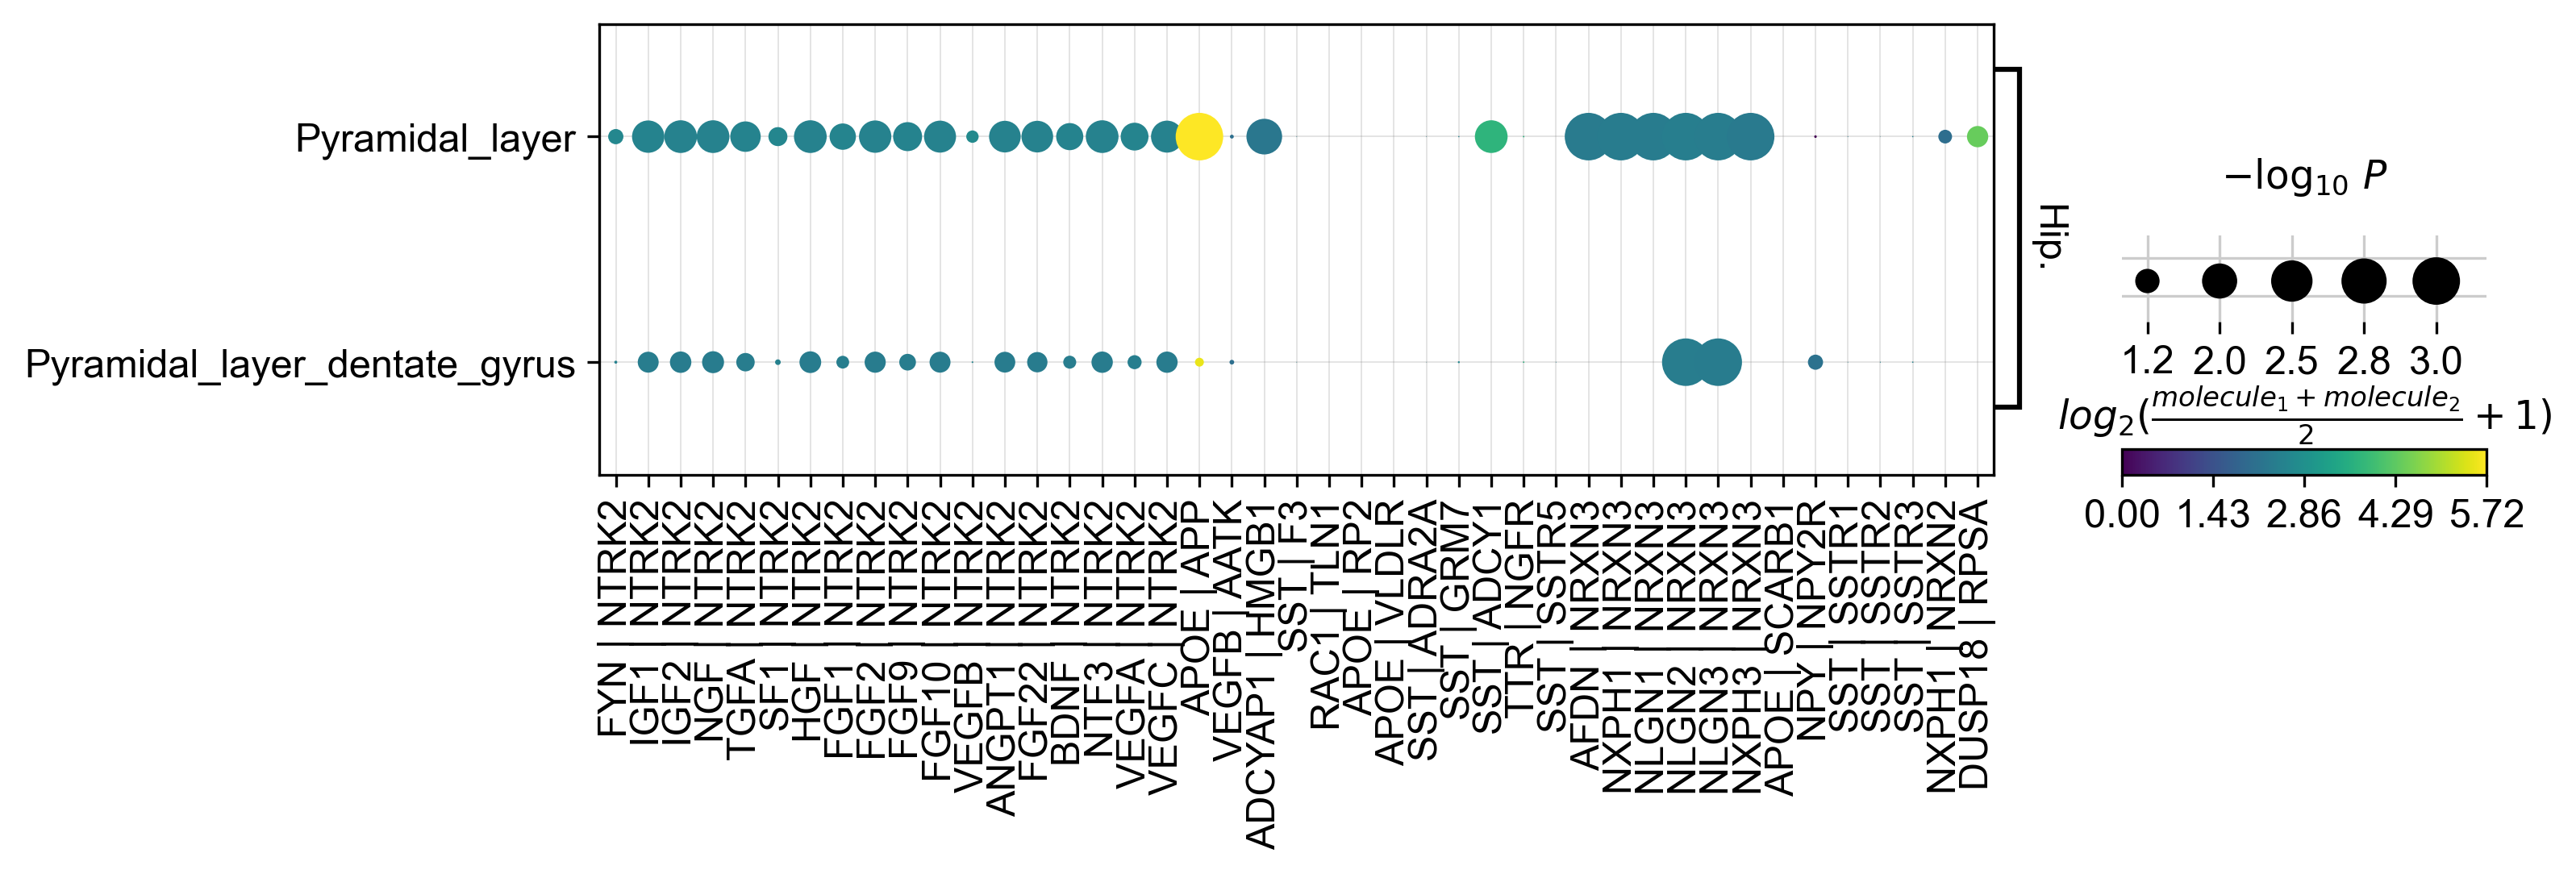

In [45]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(3, np.inf),
    alpha=1e-4,
    swap_axes=True,
    dpi=300,
    title="",
    figsize=(10, 2),
    y_padding=0.5,
    x_padding=0.50,
    width=2,
    #     height=10,
    save="ligrec_visium.png",
)